# Black Friday Sales Prediction

This dataset comprises of sales transactions captured at a retailed store. It's a classic dataset to explore and expand our feature engineering skills and day to day understanding from multiple shopping experience. This is a regression problem. 

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import dataset

sales = pd.read_csv(r"C:\Users\Aayush\Documents\Python Learning\pandas-project\Data Analysis with python\Black Friday Sales Prediction\train.csv")
test = pd.read_csv(r"C:\Users\Aayush\Documents\Python Learning\pandas-project\Data Analysis with python\Black Friday Sales Prediction\test.csv")

sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
# for submission

submission = pd.DataFrame()

submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']
submission['Purchase'] = np.nan

submission

,User_ID,Product_ID,Purchase
0,1000004,P00128942,NaN
1,1000009,P00113442,NaN
2,1000010,P00288442,NaN
3,1000010,P00145342,NaN
4,1000011,P00053842,NaN
...,...,...,...
233594,1006036,P00118942,NaN
233595,1006036,P00254642,NaN
233596,1006036,P00031842,NaN
233597,1006037,P00124742,NaN


# Data Exploraiton



In [7]:
sales.shape

(550068, 12)

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [29]:
sales.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


There are 12 features, looking into each of these features

1. User ID: Each user has been provided a unique ID. Let's see how many unique users we have in our dataset

In [10]:
sales['User_ID'].nunique()

5891

There are about 500k+ rows in our dataset and 5891 unique users, and none of the value in this feature is null.



2. Product_ID: EAch product that is available for sales has a specific/unique product id associated with it. Let's look into the number of unique products available for sale.

In [12]:
sales['Product_ID'].nunique()

3631

There are total of 3631 product available for sales. Let go shopping!!


3. Gender: Gender is a categorical variables with categires: Male(M) and Female(F)

In [14]:
sales.Gender.value_counts(normalize =True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

Really? Male are shopping most in black friday sales as they constiture 75% of the data


4. Age: Age is again a categorical data with age divide in particular range.


In [15]:
sales.Age.value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

5. Occupation: The Occupation number is the ID number of occupation type of each customer. We can see that around 21 different occupatoins exist.

In [16]:
sales['Occupation'].nunique()

21

6. City Category: The city has been categorized into 3 catogiries i.e. A, B, C.

In [17]:
sales.City_Category.value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

7. Stay_In_Current_City_Years: This depects the number of year from which a person is residing in that particular city. It has been divided into 5 categories.

In [18]:
sales.Stay_In_Current_City_Years.value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

8. Marital_Status: This features show if a person is married or not.



In [19]:
sales.Marital_Status.value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [27]:
columns = sales[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']]
columns.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,F,0-17,10,A,2,0
1,F,0-17,10,A,2,0
2,F,0-17,10,A,2,0
3,F,0-17,10,A,2,0
4,M,55+,16,C,4+,0


In [28]:
for column in columns:
    print(column)
    print(columns[column].value_counts())
    print("")

Gender
Gender
M    414259
F    135809
Name: count, dtype: int64

Age
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

Occupation
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

City_Category
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

Stay_In_Current_City_Years
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

Marital_Status
Marital_Status
0    324731
1    225337
Name: count, dtype: int64



# Missing data

In [30]:
# Lets combine the data for data preparation

test['Purchase'] = np.nan
sales['data']='train'
test['data']='test'

test = test[sales.columns]

combined = pd.concat([sales,test],axis=0)

In [33]:
test.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN,test


In [32]:
sales.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,train


In [34]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [35]:
sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
data                               0
dtype: int64

Here we can see that, two columns contain missing values

In [36]:
# checking out how much empty value it has

percent = (sales.isnull().sum() / sales.isnull().count())
percent

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
data                          0.000000
dtype: float64

Prodcut_category_3 has 70% data missing. so imputing this much data is not feasible. It is better to drop this column

In [39]:
combined.drop('Product_Category_3',axis=1,inplace=True)

In [40]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969.0,train


In [41]:
combined.Product_Category_2.value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

These are almost 18 categories in which these Product_Category_2 is divided ,imputing the mean value does make sense because that gives a decimal term 9.8 which is not a product category here. So, there are 2 possible ways median or mode.

In [42]:
#imputed missing values with random values in the same probability distribution as given feature already had

vc = combined.Product_Category_2.value_counts(normalize = True)
miss = combined.Product_Category_2.isna()
combined.loc[miss, 'Product_Category_2'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

In [43]:
combined.Product_Category_2.value_counts()

Product_Category_2
8.0     133141
14.0    115040
2.0     102579
16.0     89971
15.0     78678
5.0      54227
4.0      53583
6.0      34182
11.0     29609
17.0     27804
13.0     21914
9.0      11902
12.0     11315
10.0      6472
3.0       6051
18.0      5955
7.0       1244
Name: count, dtype: int64

In [44]:
combined.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Purchase                      233599
data                               0
dtype: int64

There are no null values left in the dataset. The purchase null vlaues are because of the test data that needs to be predicted.

# Exploraotry Data Analysis and Visualization


In [45]:
# using the train data part from combined dataset for EDA

sales_1 = combined[combined['data']=='train']


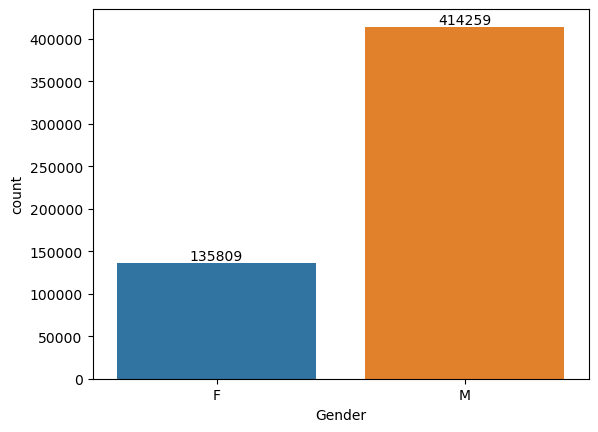

In [61]:
ax = sns.countplot(x='Gender',data=sales_1)

for bars in ax.containers:
    ax.bar_label(bars)

This graph shows that there are almost 3 times more male customers than female.

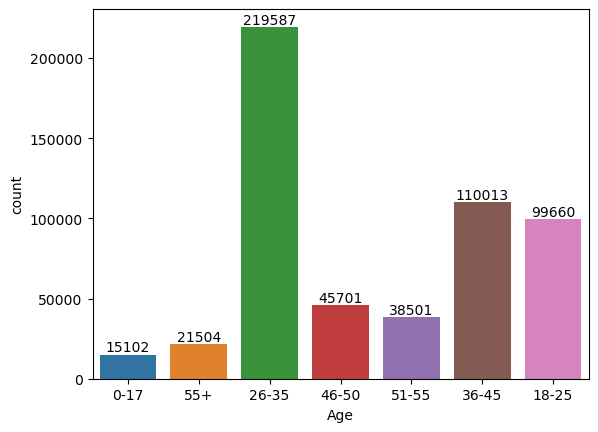

In [63]:
ax= sns.countplot(x='Age',data=sales_1)

for bars in ax.containers:
    ax.bar_label(bars)

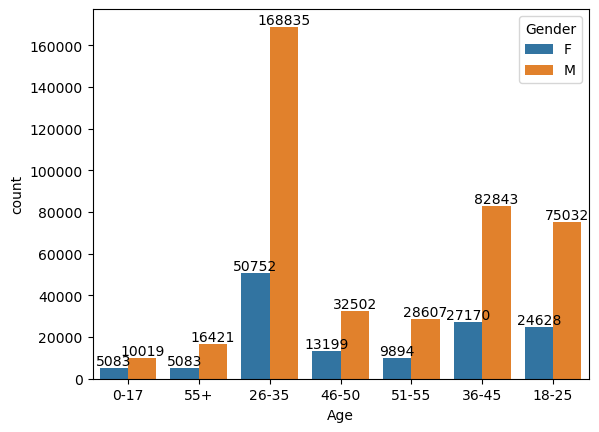

In [68]:
ax= sns.countplot(x='Age',hue='Gender',data=sales_1)

for bars in ax.containers:
    ax.bar_label(bars)

this graph shows that majority of customers that purchase things during the sales season belong to age group of 26-35 and 36-45. Morever, people fron age group 26-45 are major customer.

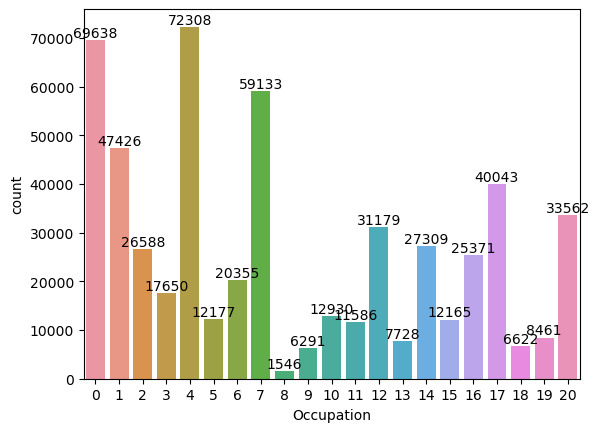

In [64]:
ax = sns.countplot(x='Occupation',data = sales_1)

for bars in ax.containers:
    ax.bar_label(bars)

This graph shows that top three occupations with majority of buyer is 4,0,7

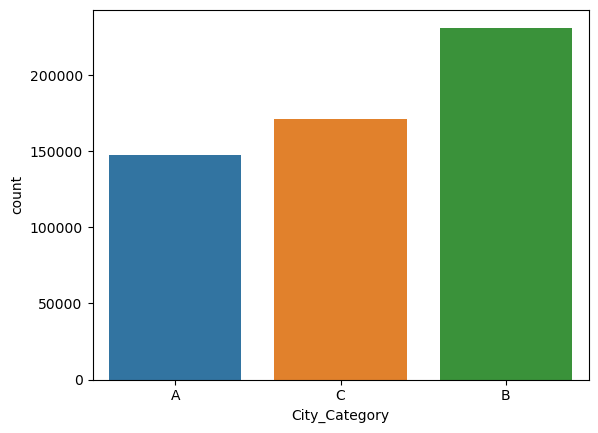

In [67]:
sns.countplot(x='City_Category',data=sales_1)
plt.show()

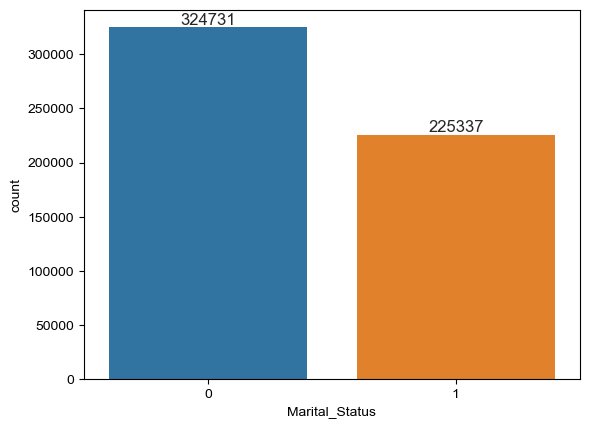

In [70]:
ax = sns.countplot(x='Marital_Status', data = sales_1)

sns.set(rc={'figure.figsize':(8,5)})
for bars in ax.containers:
    ax.bar_label(bars)

This graph shows that single people tend to buy more things during sales.

### Bivariate Analysis/ Multivariate Analysis

In [83]:
mean_sale = sales_1.groupby('Age')['Purchase'].mean().sort_values(ascending=False)

mean_sale

Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64

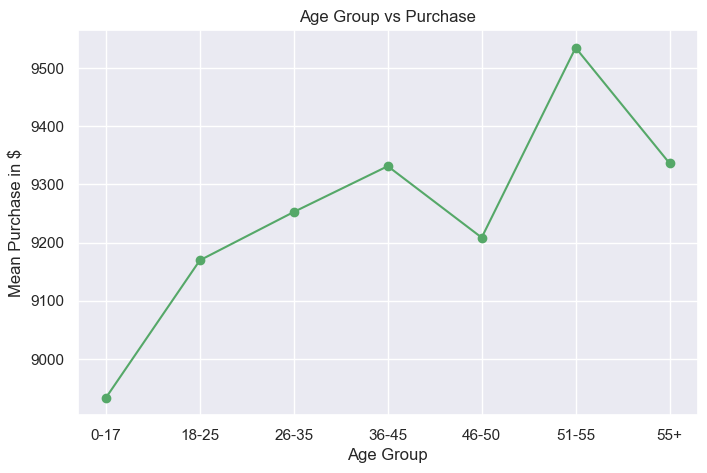

In [79]:
data = sales_1.groupby('Age')['Purchase'].mean()

plt.plot(data.index, data.values, marker='o', color='g')
plt.xlabel('Age Group')
plt.ylabel('Mean Purchase in $')
plt.title('Age Group vs Purchase')
plt.show()

In [84]:
total_sale = sales_1.groupby('Age')['Purchase'].sum().sort_values(ascending=False)

total_sale

Age
26-35    2.031771e+09
36-45    1.026570e+09
18-25    9.138487e+08
46-50    4.208434e+08
51-55    3.670996e+08
55+      2.007674e+08
0-17     1.349132e+08
Name: Purchase, dtype: float64

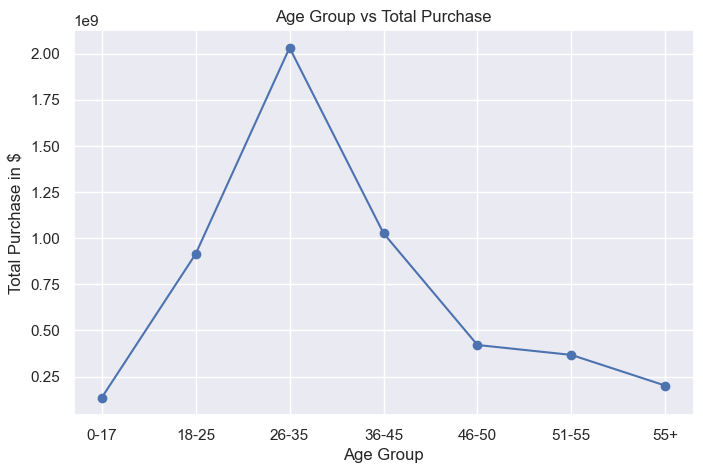

In [78]:
data = sales_1.groupby('Age')['Purchase'].sum()

plt.plot(data.index, data.values, marker='o', color='b')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase in $')
plt.title('Age Group vs Total Purchase')
plt.show()

While we previously saw that people of age group 26-35 have purchased most. Although they purchased most but the average amount spend by age group 51-55 is most during festival season sales.

When I tried to see more about this age and purchase relation, I found that although average amount spend by age group of 51-55 is most, people of age group 20-26 have spent most during sales..

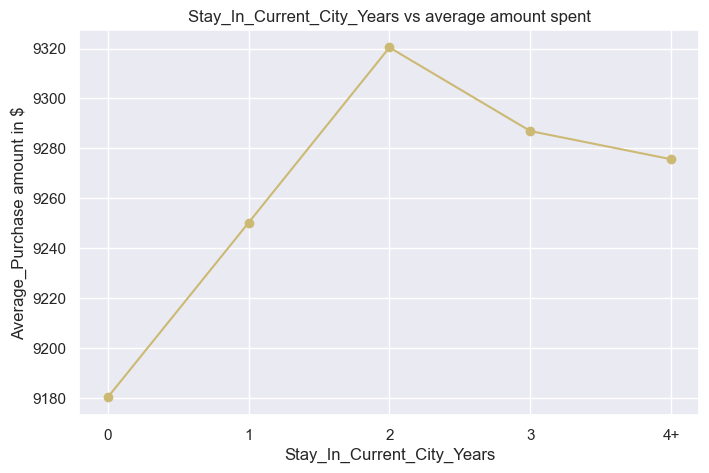

In [76]:
# Average amount spend based on the time of stay in the current city

data = sales_1.groupby('Stay_In_Current_City_Years')['Purchase'].mean()

plt.plot(data.index,data.values,marker='o',color='y')
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Average_Purchase amount in $');
plt.title('Stay_In_Current_City_Years vs average amount spent');
plt.show()

People who have been living in city around 2 years or more years are on an average spending more amount in sales.

People who have lived in city for like around 1 years have spent most in sales.

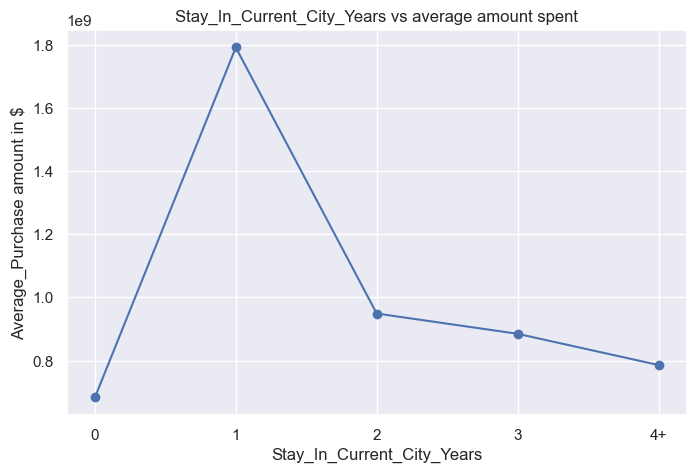

In [86]:
# Most amount spend based on the time of stay in the current city

data = sales_1.groupby('Stay_In_Current_City_Years')['Purchase'].sum()

plt.plot(data.index,data.values,marker='o',color='b')
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Average_Purchase amount in $');
plt.title('Stay_In_Current_City_Years vs average amount spent');
plt.show()

### Marital Status

<b>The purchasers, are they married or not?</b> and who have spent most?

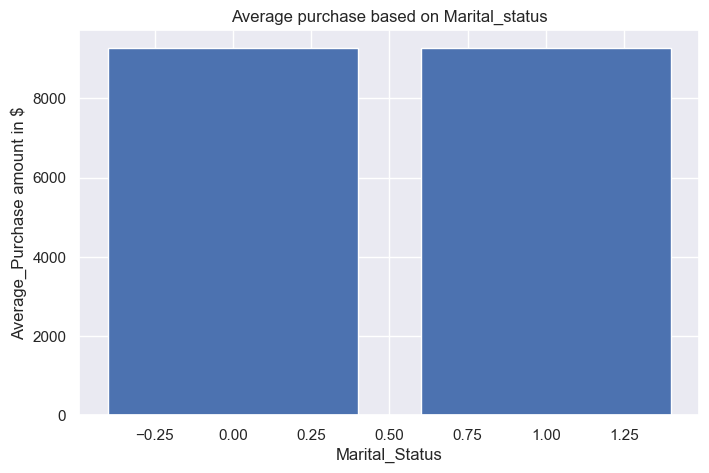

In [89]:
# Average amount spend based on Marital status

data = sales_1.groupby('Marital_Status')['Purchase'].mean()

plt.bar(data.index,data.values)
plt.xlabel('Marital_Status');
plt.ylabel('Average_Purchase amount in $');
plt.title('Average purchase based on Marital_status');
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

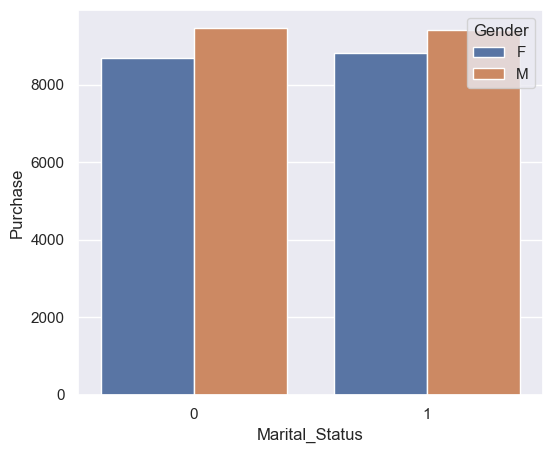

In [91]:
sales_marital_status = sales_1.groupby(['Marital_Status','Gender'],as_index = False)['Purchase'].mean()

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status',y='Purchase', hue='Gender',data = sales_marital_status)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

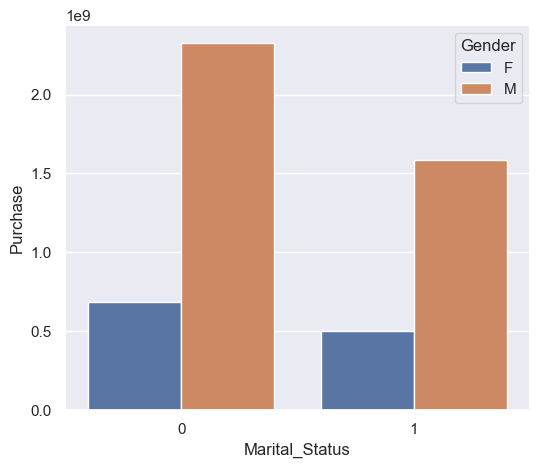

In [90]:
sales_marital_status = sales_1.groupby(['Marital_Status','Gender'],as_index = False)['Purchase'].sum()

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status',y='Purchase', hue='Gender',data = sales_marital_status)

Martial_Status plots shows that purchasers who are married or not, have almost same average of purchase. As well, we've already discovered most of the purchaser are male. It shows that single male have spent more than the married one.

<b> Top 10 products</b>

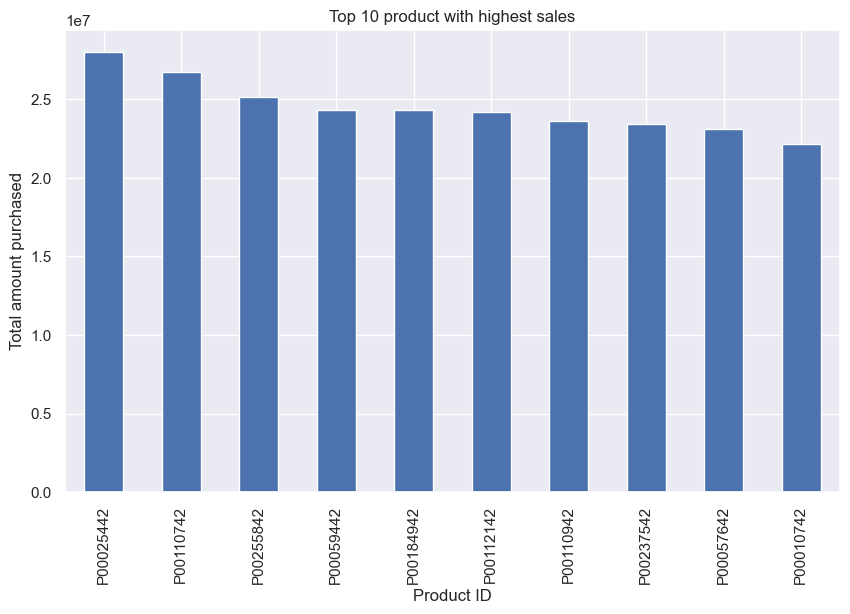

In [92]:
data = sales_1.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))

data[0:10].plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased')
plt.title('Top 10 product with highest sales')
plt.show()

In [94]:
# Products that are most purchased by each of the age group

a = pd.crosstab(sales_1['Age'],sales_1['Product_ID'])
a.idxmax(axis=1)

Age
0-17     P00255842
18-25    P00265242
26-35    P00265242
36-45    P00025442
46-50    P00265242
51-55    P00265242
55+      P00265242
dtype: object

<b> Occupation </b>

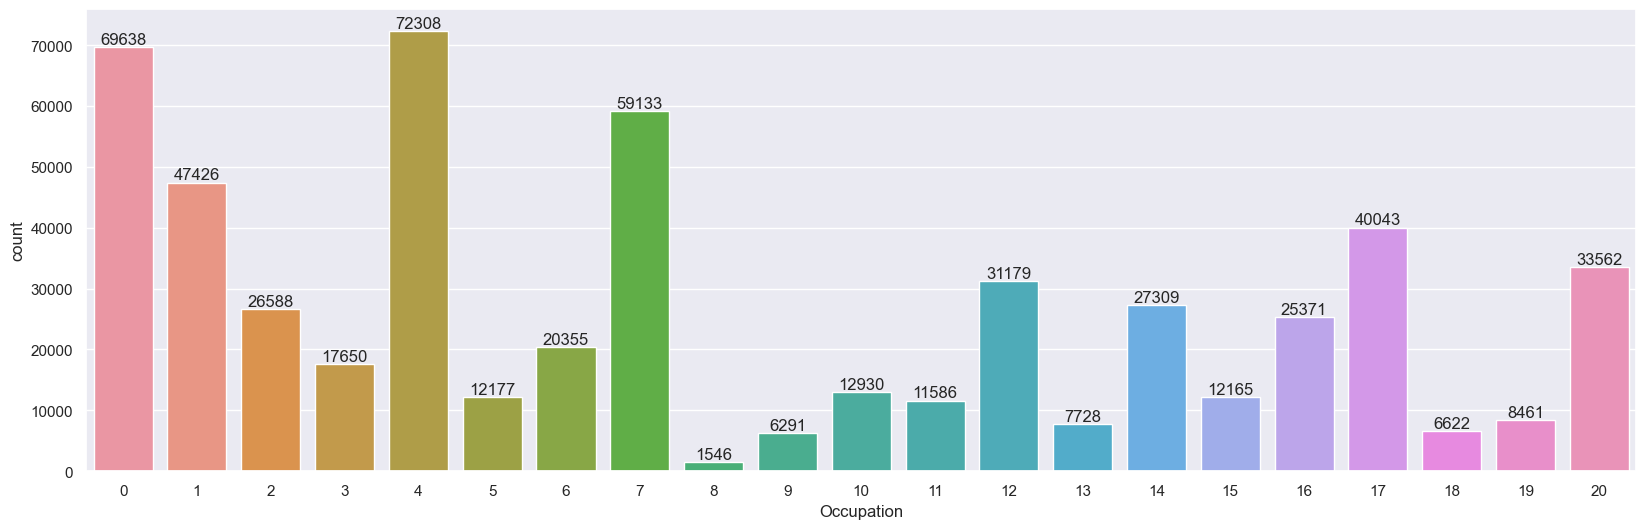

In [95]:
sns.set(rc={'figure.figsize':(20,6)})

ax= sns.countplot(x='Occupation',data=sales_1)

for bars in ax.containers:
    ax.bar_label(bars)

In [98]:
sales_occupation = sales_1.groupby(['Occupation'],as_index = False)['Purchase'].sum().sort_values(by='Purchase',ascending = False)

sales_occupation

,Occupation,Purchase
4,4,666244484.0
0,0,635406958.0
7,7,557371587.0
1,1,424614144.0
17,17,393281453.0
12,12,305449446.0
20,20,296570442.0
14,14,259454692.0
16,16,238346955.0
2,2,238028583.0


<Axes: xlabel='Occupation', ylabel='Purchase'>

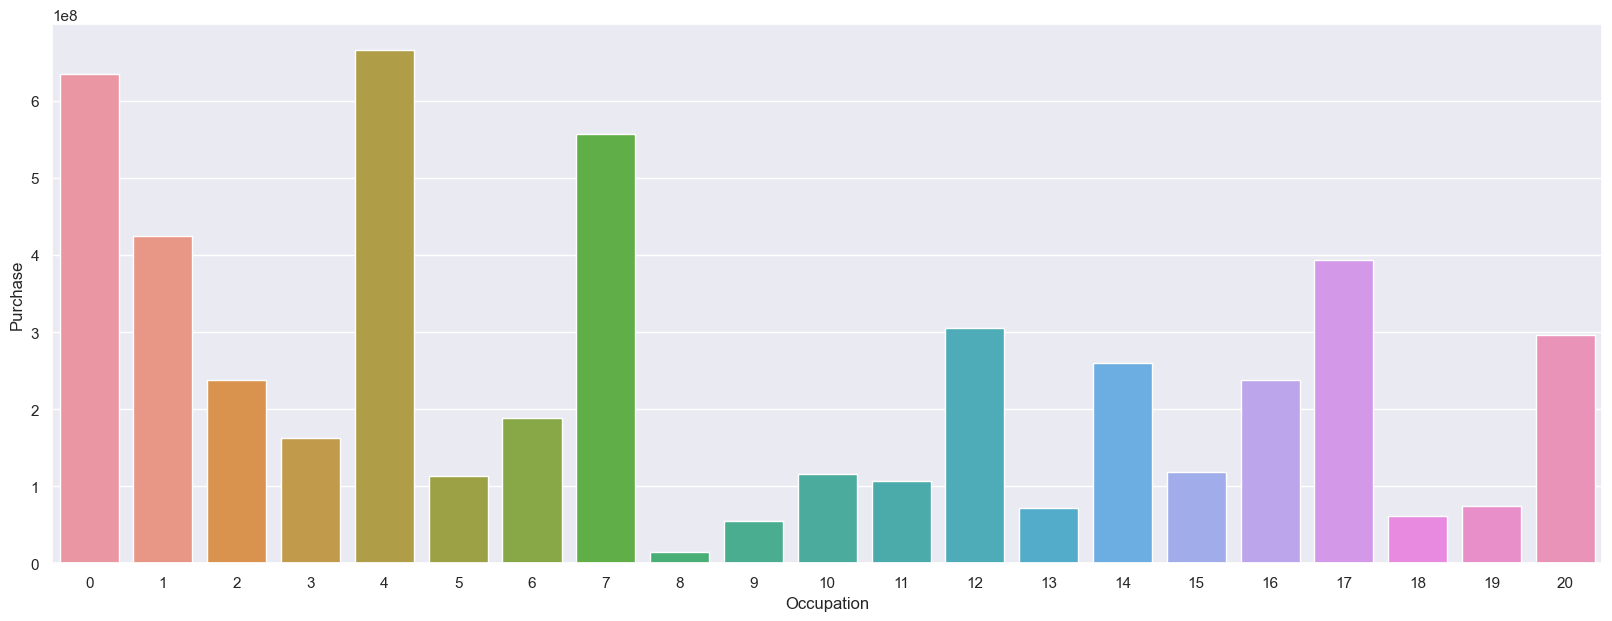

In [101]:
sales_occupation = sales_1.groupby(['Occupation'],as_index = False)['Purchase'].sum()


sns.set(rc = {'figure.figsize':(20,7)})
sns.barplot(x='Occupation',y='Purchase',data = sales_occupation)

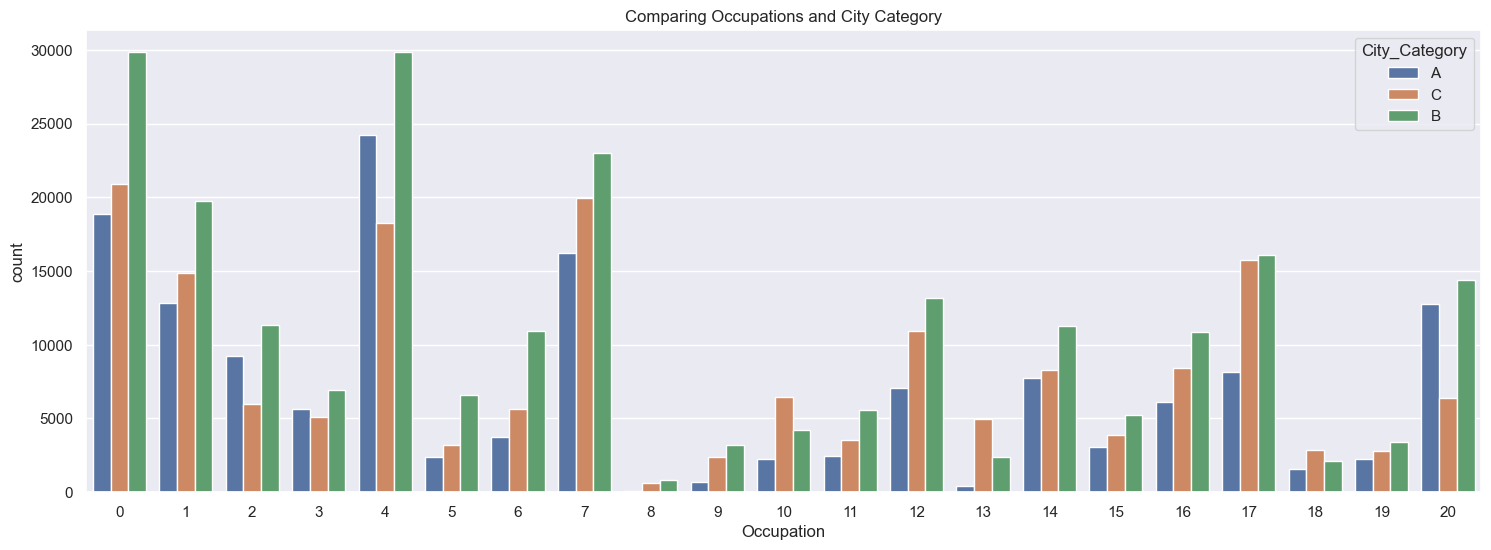

In [102]:
# Occupations and city category

plt.figure(figsize=(18,6))
sns.countplot(x='Occupation',data=sales_1,hue='City_Category')
plt.title('Comparing Occupations and City Category')
plt.show()

People from occupation 4,0,7 are buying the most and most of the people are belongs to City Category B.

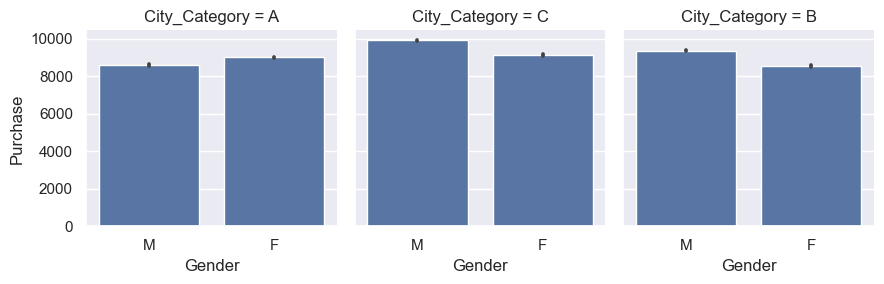

In [104]:
g= sns.FacetGrid(sales_1, col='City_Category')
g.map(sns.barplot,"Gender","Purchase")
plt.show()

For City Categories B and C, males tend to dominate the purchasing, whereas female tend to purchase more in A than men.

# Data Preprocessing

In [105]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,2.0,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,15.0,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,2.0,7969.0,train


In [106]:
# User id preprocessing, eg 10000001 -> 1
combined['User_ID'] = combined['User_ID']-1000000

# product_id preprocess e.g P0006942 -> 69042
combined['Product_ID'] = combined['Product_ID'].str.replace('P00','')

combined['Product_ID'] = pd.to_numeric(combined['Product_ID'],errors='coerce')

In [107]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  data                        783667 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 77.7+ MB


In [108]:
# changing datatype of product_category2

combined['Product_Category_2'] = combined['Product_Category_2'].astype('int64')

In [109]:
# columns with object datatype

cat_cols = combined.select_dtypes(['object']).columns
cat_cols

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'data'], dtype='object')

In [110]:
combined[combined['Stay_In_Current_City_Years'] == '4+']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data
4,2,285442,M,55+,16,C,4+,0,8,2,7969.0,train
19,8,249542,M,26-35,12,C,4+,1,1,5,19614.0,train
20,8,220442,M,26-35,12,C,4+,1,5,14,8584.0,train
21,8,156442,M,26-35,12,C,4+,1,8,13,9872.0,train
22,8,213742,M,26-35,12,C,4+,1,8,14,9743.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,6036,118942,F,26-35,15,B,4+,1,8,14,NaN,test
233595,6036,254642,F,26-35,15,B,4+,1,5,8,NaN,test
233596,6036,31842,F,26-35,15,B,4+,1,1,5,NaN,test
233597,6037,124742,F,46-50,1,C,4+,0,10,16,NaN,test


For Stay_In_Current_City_Years, we need to convert the object datatypes to int. It contains a category which has '4+' that needs to be altered.

In [113]:
# 4+ to 4
combined['Stay_In_Current_City_Years'] =np.where(combined['Stay_In_Current_City_Years'].str[:2]=="4+",4,combined['Stay_In_Current_City_Years'])

#object to int
combined['Stay_In_Current_City_Years'] = pd.to_numeric(combined['Stay_In_Current_City_Years'],errors='coerce')

In [114]:
# Gender

# Gender 'F' for female are represented by value of 0
# Gender 'M' for male are represented by value of 1

combined['Gender'] = combined['Gender'].map({'F':0,'M':1}).astype(int)

In [115]:
# Age
# In age group column, we modified range with its mean value
combined['Age'] = combined['Age'].map({'0-17':9,'18-25': 22,
                               '26-35': 31,
                               '36-45': 42,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})

combined['Age'].value_counts()

Age
31    313015
42    156724
22    141953
48     65278
53     54784
60     30579
9      21334
Name: count, dtype: int64

In [118]:
# City_category: dummy variables for this features

combined = pd.get_dummies(combined, columns=['City_Category'],drop_first=True)

In [120]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,2,8370.0,train,False,False
1,1,248942,0,9,10,2,0,1,6,15200.0,train,False,False
2,1,87842,0,9,10,2,0,12,15,1422.0,train,False,False
3,1,85442,0,9,10,2,0,12,14,1057.0,train,False,False
4,2,285442,1,60,16,4,0,8,2,7969.0,train,False,True


In [121]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  int32  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  int64  
 9   Purchase                    550068 non-null  float64
 10  data                        783667 non-null  object 
 11  City_Category_B             783667 non-null  bool   
 12  City_Category_C             783667 non-null  bool   
dtypes: bool(2), float64

In [125]:
combined[['City_Category_B','City_Category_C']] = combined[['City_Category_B','City_Category_C']].astype('uint8')

In [126]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  int32  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  int64  
 9   Purchase                    550068 non-null  float64
 10  data                        783667 non-null  object 
 11  City_Category_B             783667 non-null  uint8  
 12  City_Category_C             783667 non-null  uint8  
dtypes: float64(1), int3

In [128]:
# Splitting data back into train and test as it was already provided

sales = combined[combined['data']=='train']
del sales['data']

test_input = combined[combined['data']=='test']
test_input.drop(['Purchase','data'],axis=1,inplace=True)

del combined

In [130]:
sales.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,2,8370.0,0,0
1,1,248942,0,9,10,2,0,1,6,15200.0,0,0


In [131]:
test_input.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_B,City_Category_C
0,4,128942,1,48,7,2,1,1,11,1,0
1,9,113442,1,31,17,0,0,3,5,0,1


In [132]:
combined

NameError: name 'combined' is not defined

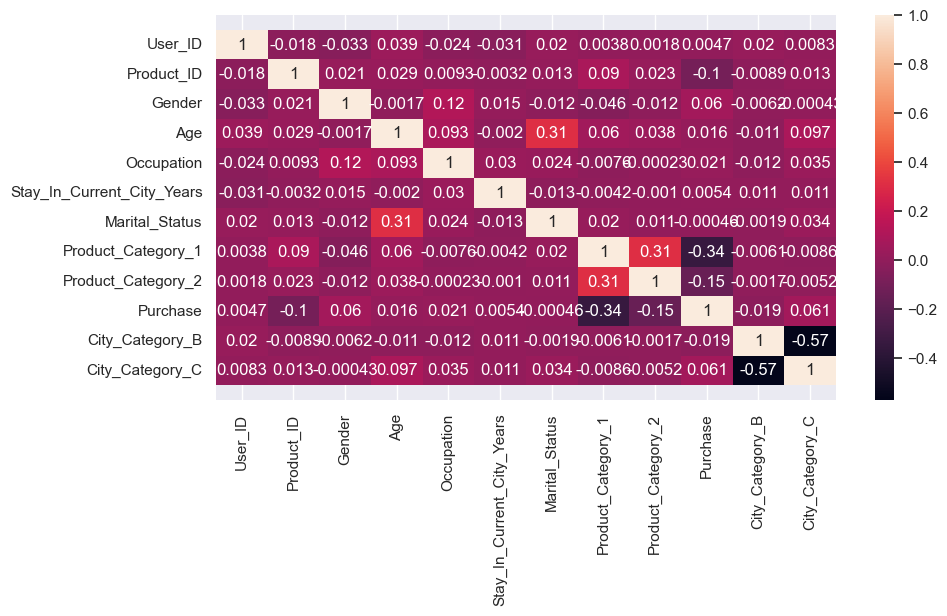

In [134]:
plt.figure(figsize=(10,5))

cor =sales.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

# Model Building

In [135]:
# splitting data into X and Y

X = sales.drop('Purchase',axis=1)
y = sales['Purchase']


# train_test_split for model development
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print("Size of train data: ",x_train.shape[0])
print("size of test data: ",x_test.shape[0])

Size of train data:  385047
size of test data:  165021


In [137]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train, y_train)  # training the algorithm

# Getting the coefficient and intercept
print("Coefficents: ",lm.coef_)
print("\n\n Intercept: ",lm.intercept_)

Coefficents:  [ 1.51610878e-02 -3.71058722e-03  5.35825340e+02  1.49491708e+01
  6.80362620e+00  1.26506663e+01 -5.96667595e+01 -4.10483342e+02
 -4.72436199e+01  1.79660085e+02  6.99293698e+02]


 Intercept:  11272.800323786507


In [139]:
# predicting on the test data

y_pred = lm.predict(x_test)

from sklearn import metrics

print('R2 score : ',metrics.r2_score(y_test, y_pred))
print('mean square error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 score :  0.13214981141909865
mean square error:  4685.21922184075


The score genereated with the Linear Regression model was very low so used Regularized Linear Model i.e Ridge Regression

Ridge Regression: This model solves a regression model where the loss function is the linear least squares function and regularization is given by the I2-norm. Also known as Ridge Regression

In [140]:
from sklearn.linear_model import Ridge

In [145]:
RR = Ridge(alpha = 0.05)

RR.fit(x_train, y_train)
y_pred = RR.predict(x_test)

print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


rmse:  4685.219221502264


Linear Regression Models were not given much improvememt, let's try non-linear regression model, <b>Decision Tree</b>

<b>Decision Tree Regressor</b>

Decision Tree Regressor works by partitioning feature space into a set of rectangular regions and predicts the target variable by averaging the target values of training samples within each region.

import module

$$
 from \ sklearn.tree \ import \ DecisionTreeRegressor
$$


   - max_depth: It limits number of levels in tree, which help overfitting. For example: max_depth=8, sets maximum depts of tree to 8 level
   - min_samples_leaf = This parameter specifies the minimum number of sample required to be at a leaf node. It helps prevent the creation of node with very few samples, which can lead to overfitting.
   
 [Note]: 
 1. High min_samples_leaf: It can help prevent overfitting, especially when the dataset is small or noisy, by reducing the complexity of the tree.
 2. Low min_samples_leaf: It can be beneficial when the dataset is large and rich in features, as it allows the tree to capture complex relationships.

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
# Decision Tree Model
DT = DecisionTreeRegressor(max_depth = 15, min_samples_leaf=100)

DT.fit(x_train, y_train)

y_pred = DT.predict(x_test)

print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse:  2735.68346772824


In [148]:
# Decision Tree 2

DT2 = DecisionTreeRegressor(max_depth = 8, min_samples_leaf=150)

DT2.fit(x_train, y_train)

y_pred = DT2.predict(x_test)

print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse:  2879.1498155233526


<b>Random Forest Regressor:</b>

Random Forest is an ensemble machine learning algorithm that follows the <b>bagging</b> technique. The base estimators in random forest are decision trees. It randomly selects a set of features which are used to decide the best split at each node of the decision tree.

<b>Bagging:</b> each tree is trained on a random subset of the training data with replacement. This helps overfitting by introducing diversity among trees.

Parameters:
  - (n_estimators): Increasing the number of trees generally improves the performance of the model, as it reduces overfitting and increases the robustness of predictions. However, adding more trees also increases the computational complexity and training time.

   - the maximum depth of the trees (max_depth):The maximum depth of each decision tree (max_depth) controls the maximum number of levels in each tree. Increasing max_depth allows the trees to capture more complex relationships in the data, potentially leading to better performance on the training set

   - the minimum number of samples required to split a node (min_samples_split):  Increasing min_samples_split prevents the model from creating overly specific and detailed splits, thereby reducing the risk of overfitting.

   - the minimum number of samples required to be at a leaf node (min_samples_leaf):  determines the minimum size of terminal nodes (leaves) in the decision tree. Increasing min_samples_leaf helps prevent the model from creating nodes with very few samples, which can reduce overfitting and improve the model's ability to generalize.

   - random_state: you use the same random_state value, you should get the same results each time you train the model, which is essential for reproducibility and debugging.
    
  -  oob_score:it indicates whether to use out-of-bag samples to estimate the R^2 score of the model during training. If you set oob_score=True, the model will compute the out-of-bag R^2 score during training, which can provide valuable insight into the model's generalization performance without requiring additional data for validation.

In [149]:
#Fitting the model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=3, max_depth=10, n_estimators=25)

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print('r2 score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2 score:  0.6907421295238949
rmse:  2796.8418907671758


In [151]:
# another random forest

rf2 = RandomForestRegressor(random_state=3, max_depth=10,min_samples_split=500,oob_score=True)

rf2.fit(x_train,y_train)
y_pred = rf2.predict(x_test)

print('r2 score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2 score:  0.6883092141364173
rmse:  2807.821642751931


In [153]:
rf3 = RandomForestRegressor(n_estimators=30,random_state=3,max_depth=15,min_samples_split=100,oob_score=True)


rf3.fit(x_train,y_train)

y_pred = rf3.predict(x_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.71255749930848
rmse: 2696.391978812218


<b>ExtraTreesRegressor:</b>

The main difference between random forest and extra trees (usually called extreme random forests) lies in the fact that, instead of computing the locally optimal feature/split combination (for the random forest), for each feature under consideration, a random value is selected for the split (for the extra trees) 

In [155]:
# fitting the model
from sklearn.ensemble import ExtraTreesRegressor

rf = ExtraTreesRegressor()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print('r2 score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2 score:  0.6824930528202444
rmse:  2833.8975870831773


<b>XG BRegressor:</b>

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as 'regularized boosting' technique.

In [162]:
from xgboost import XGBRegressor

# XGBoost Model 1

xgb1 = XGBRegressor(n_estimators = 1000, learning_rate =0.05)

xgb1.fit(x_train,y_train)
y_pred = xgb1.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score:  0.7292817783838658
rmse:  2616.7743824573927


In [163]:
# XGBoost Model 2

xgb2 = XGBRegressor(n_estimators = 500,max_depth=10, learning_rate =0.05)

xgb2.fit(x_train,y_train)
y_pred = xgb2.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score:  0.7403600508133426
rmse:  2562.6735887592645


In [164]:
xgb2 = XGBRegressor(n_estimators=500, max_depth=10, learning_rate =0.05)

xgb2.fit(X,y)
predict = xgb2.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('Sample_submission_XGB2.csv')



In [166]:
# XGBoost Model 3

xgb3 = XGBRegressor(n_estimators = 6,max_depth=500)

xgb3.fit(x_train,y_train)
y_pred = xgb3.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score:  0.6362128526759459
rmse:  3033.410676101062


In [167]:
# XGBoost Model 4

xgb4 = XGBRegressor(learning_rate=1.0,max_depth=6,min_child_weight=40,seed=0)

xgb4.fit(x_train,y_train)
y_pred = xgb4.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score:  0.7246217513784989
rmse:  2639.200300950947


min_child_weight value encourages the algorithm to create deeper trees, this can help reduce overfitting by preventing the algorithm from creating small partitions with few instances.

Setting a fixed seed allows you to obtain the same results each time you run the model, which is essential for debugging, testing, and comparing different model configurations. It ensures that the random initialization of parameters and the random sampling of data points during training are consistent, leading to reproducible results.

In [168]:
# XGBoost Model 5

xgb5 = XGBRegressor(n_estimators = 450,max_depth=8,learning_rate = 0.076)

xgb5.fit(x_train,y_train)
y_pred = xgb5.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score:  0.7381787980209675
rmse:  2573.415671868162


In [169]:
# XGBoost Model 6

xgb6 = XGBRegressor(n_estimators = 470,max_depth=9,learning_rate = 0.06)

xgb6.fit(x_train,y_train)
y_pred = xgb6.predict(x_test)

print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('rmse: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score:  0.7397137028020481
rmse:  2565.8613674813205


# Conclusion

Comparing all the models, we conclude that XGBRegressor model is the best model to be able to predict purchae amount from our dataset.

Parameters and score:

   xgb2 = XGBRegressor(n_estimators = 500,max_depth=10, learning_rate =0.05)
   
   r2_score:  0.7403600508133426
   
   rmse:  2562.6735887592645


In [170]:
df = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
df1 = df.head(25)
df1.head()

,Actual,Predicted
41001,15228.0,14011.988281
16151,1088.0,589.381042
507262,16426.0,16589.187500
368698,12042.0,18456.298828
353782,8699.0,6896.984863


In [174]:
df

,Actual,Predicted
41001,15228.0,14011.988281
16151,1088.0,589.381042
507262,16426.0,16589.187500
368698,12042.0,18456.298828
353782,8699.0,6896.984863
...,...,...
171866,9955.0,8623.341797
400075,15809.0,13820.999023
302882,13698.0,12683.158203
499383,9856.0,11115.744141


In [171]:
# Feature Importance

imp = pd.DataFrame(xgb2.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
Product_Category_1,0.808895
Product_ID,0.036368
City_Category_C,0.030271
Product_Category_2,0.018472
Occupation,0.015713
City_Category_B,0.015696
User_ID,0.015562
Age,0.015143
Stay_In_Current_City_Years,0.015012
Gender,0.014585


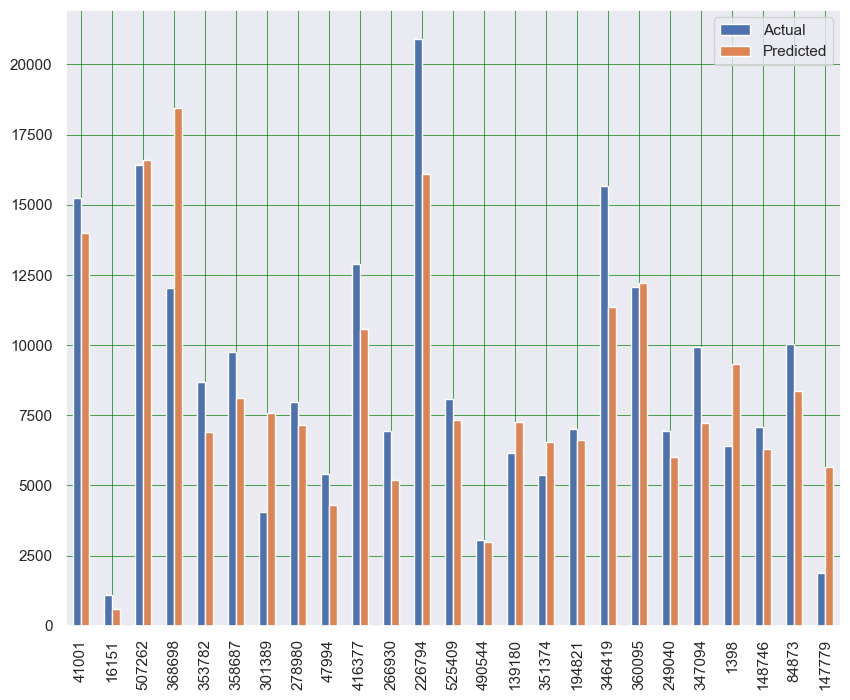

In [172]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

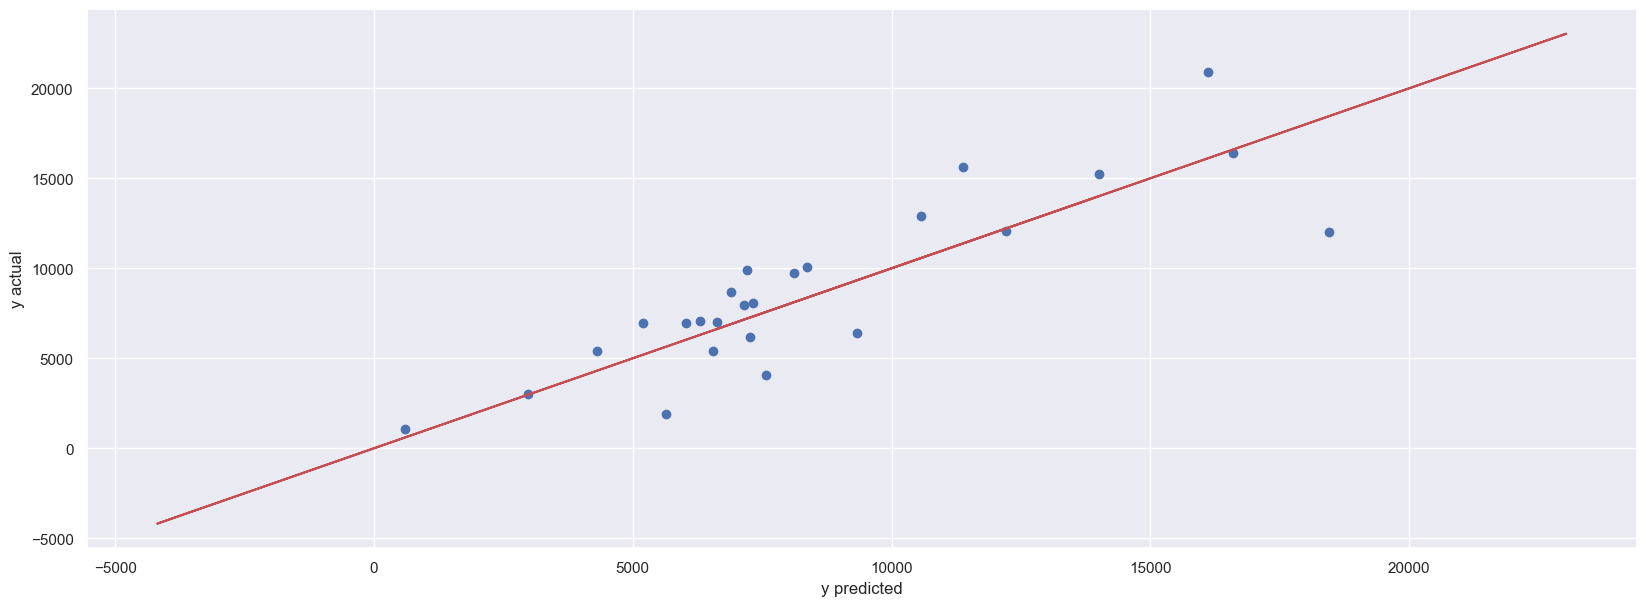

In [173]:
plt.scatter(df1.Predicted,df1.Actual)
plt.plot(y_pred,y_pred,'r')
plt.xlabel('y predicted')
plt.ylabel('y actual')
plt.show()

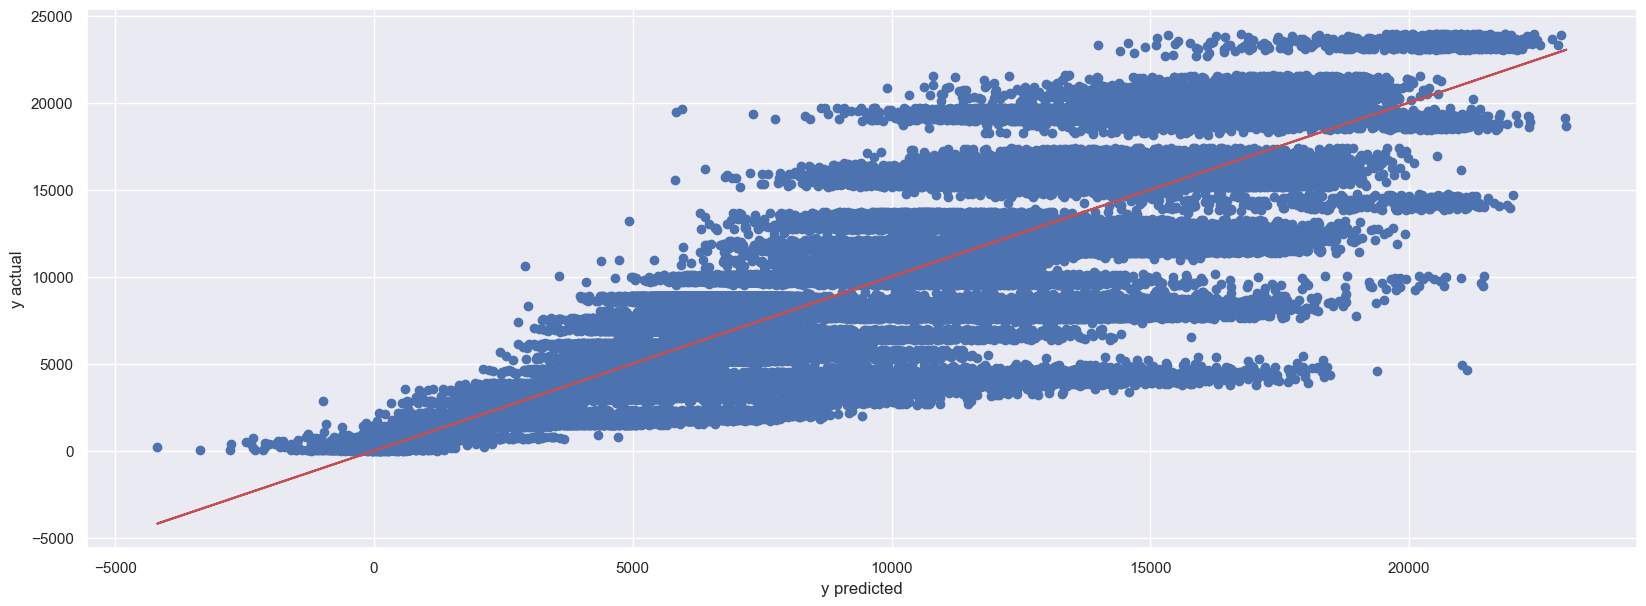

In [175]:
plt.scatter(df.Predicted,df.Actual)
plt.plot(y_pred,y_pred,'r')
plt.xlabel('y predicted')
plt.ylabel('y actual')
plt.show()